In [1]:
import graphviz
import pydotplus
import time
import numpy as np
import pandas as pd
from IPython.display import Image
from sklearn import tree

In [2]:
#in the previous section, I had already made a OLS model so we'll import that
#data since it's already been cleaned
info_df = pd.read_csv('D:\DSF\houseprices_model.csv', sep='\t', header=0)

In [3]:
#seperate the data into x and y sets
x = info_df.drop('saleprice', 1)
y = np.where(info_df['saleprice'] > 199999, 1, 0)

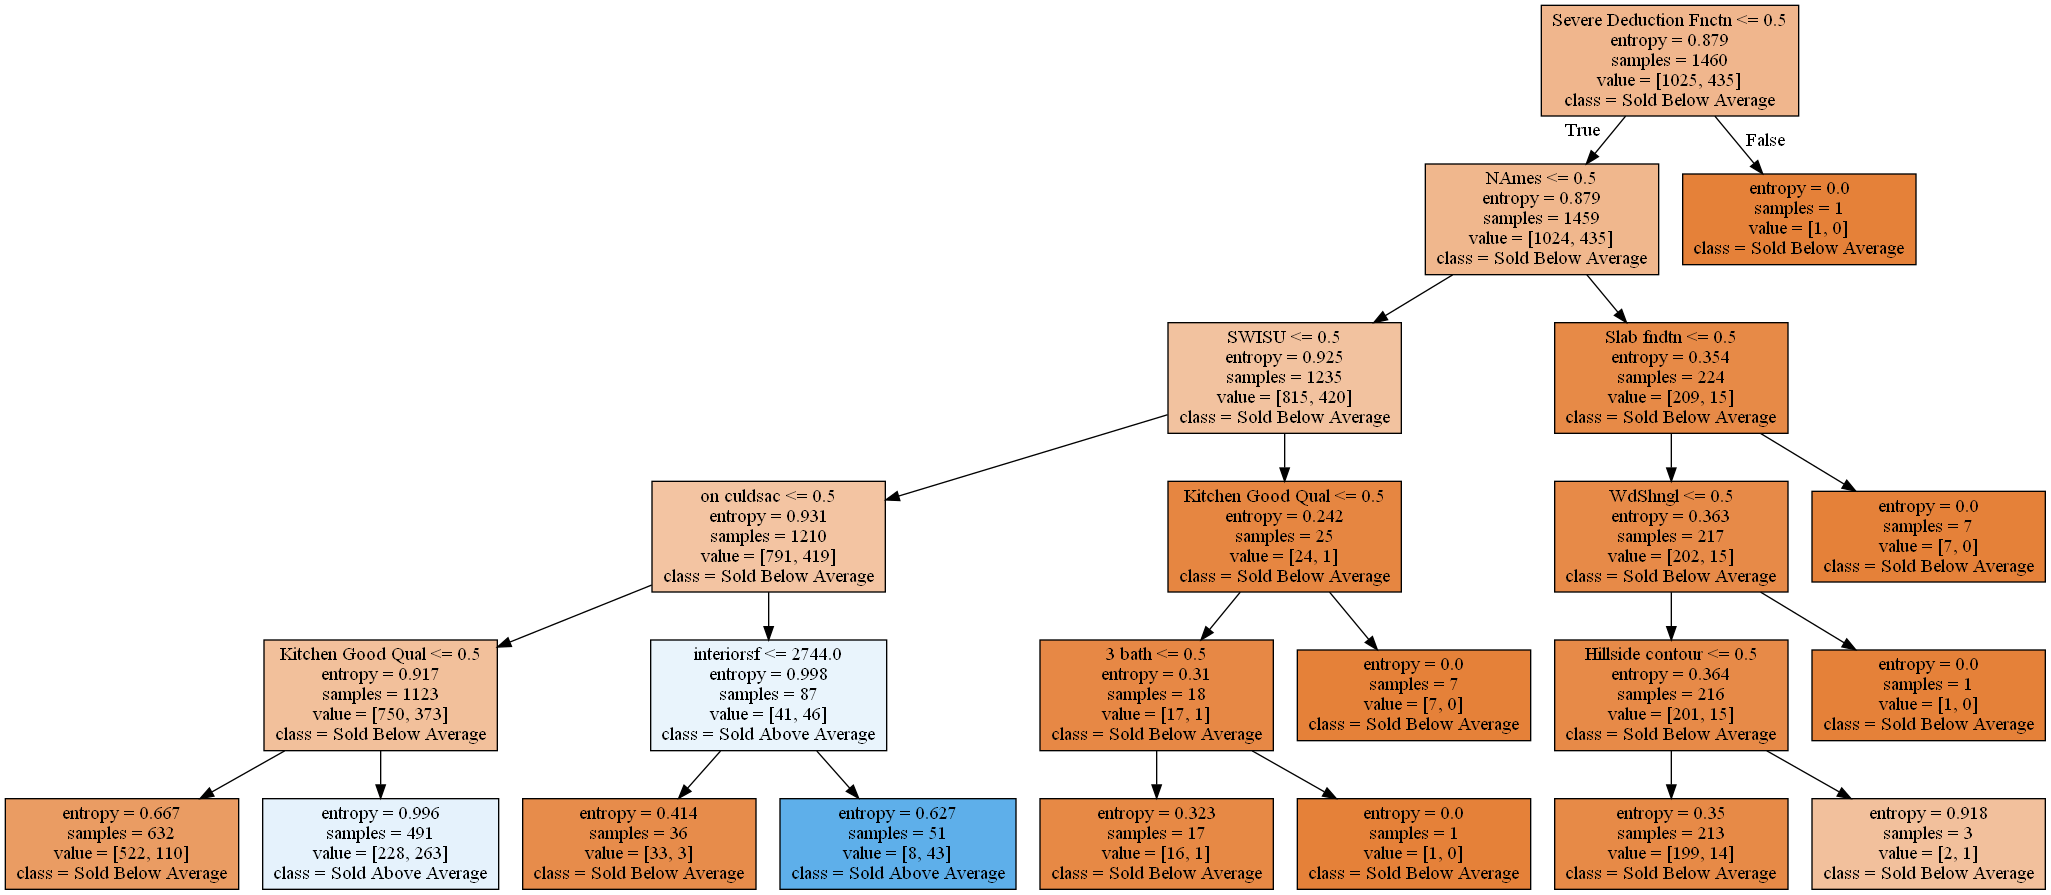

--- 0.21701264381408691 seconds ---


In [14]:
#after two hours of fighting with an install, I finaly got it to work
start_time = time.time()
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    
)
decision_tree.fit(x, y)
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=x.columns,
    class_names=['Sold Below Average', 'Sold Above Average'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
print("--- %s seconds ---" % (time.time() - start_time))

In [15]:
#random forest
start_time = time.time()
rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, x, y, cv=10)
print("--- %s seconds ---" % (time.time() - start_time))

array([0.94520548, 0.93835616, 0.94520548, 0.94520548, 0.93150685,
       0.93835616, 0.92465753, 0.9109589 , 0.95205479, 0.93835616])